In [137]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import ProbabilisticParcellation.functional_profiles as fp
from Functional_Fusion.dataset import *
import matplotlib.pyplot as plt
import string
import PcmPy as pcm
from copy import deepcopy


base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Load profile data and model

In [228]:
atlas = 'MNISymC2'

# load model
mname = f'/Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_reordered'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
info, model = ut.load_batch_best(mname)


# load labels and cmap
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              f'{fileparts[-1]}.lut')
labels=labels[1:]

# load profile
profile = pd.read_csv(
    f'{ut.model_dir}/Atlases/{fileparts[-1]}_profile.tsv', sep="\t"
)


In [139]:
profile.head()

,Unnamed: 0,dataset,session,condition,M1L,M2L,M3aL,M3bL,M4aL,M4bL,...,S2aR,S2bR,S2cR,S2dR,S3R,S4aR,S4bR,S4cR,dataset_colour,dataset_colour_name
0,0,MDTB,ses-s1,NoGo,0.007308,-0.155251,-0.054131,-0.009731,-0.327032,0.035044,...,0.065338,0.013747,-0.059765,-0.083025,0.064362,-0.191257,-0.018708,-0.038257,#1f77b4,#1f77b4
1,1,MDTB,ses-s1,Go,0.057607,0.029169,0.235781,0.103795,0.060290,0.190120,...,-0.025872,-0.003402,-0.074537,-0.105386,-0.236135,-0.067227,-0.044821,-0.214711,#1f77b4,#1f77b4
2,2,MDTB,ses-s1,ToM,0.280441,-0.085992,0.026751,-0.049840,-0.008657,-0.141051,...,0.627982,0.331534,0.373722,0.192555,-0.001632,0.425068,0.195358,0.458623,#1f77b4,#1f77b4
3,3,MDTB,ses-s1,VideoAct,-0.052990,0.581823,-0.216778,-0.235582,0.024034,-0.009431,...,-0.070370,-0.165575,-0.092672,0.063738,-0.097279,0.068210,-0.055714,0.018491,#1f77b4,#1f77b4
4,4,MDTB,ses-s1,VideoKnots,-0.008363,0.280476,-0.096940,0.026103,0.047133,0.071750,...,0.136239,0.063830,0.158205,0.348435,0.323061,0.264158,0.129202,0.255174,#1f77b4,#1f77b4


In [176]:
def print_highest(profile, df, labels, region=None, dataset=None, n=5):
    d = np.arange(len(df))
    if dataset is not None:  # Choose dataset
        d = np.nonzero((df.dataset == dataset).to_numpy())[0]
    prof = profile[d, :]
    data = df.iloc[d]

    for i, r in enumerate(labels):
        if (region is None) | (r == region):
            print(f'\nregion {r}')

            # Sort conditions by score
            scores = prof[:, i]
            zipped = zip(scores, data.condition, data.dataset)
            zipped = sorted(zipped, key=lambda x: x[0], reverse=True)
            scores, conds, datasets = zip(*zipped[:n])

            [print(f'{dataset} {cond}: {score}') for score, cond, dataset in zip(scores, conds, datasets)]


In [141]:
# Normalize profile
profile_mat = profile[labels].to_numpy()
profile_norm = profile_mat / np.sqrt(np.sum(profile_mat**2, axis=1).reshape(-1, 1))


In [229]:
region = 'M4aL'
dataset='Somatotopic'

print_highest(profile_norm, profile, labels, region=region, dataset=dataset)
print_highest(profile_mat, profile, labels, region=region, dataset=dataset)



region M4aL
Somatotopic foot-left: 0.26190663486485244
Somatotopic glutes: 0.14626584139896026
Somatotopic foot-right: 0.008532908813534914
Somatotopic hand-left: -0.017639909701400343
Somatotopic hand-right: -0.04952763751657172

region M4aL
Somatotopic foot-left: 0.8018838
Somatotopic glutes: 0.5157218
Somatotopic foot-right: 0.025101777
Somatotopic hand-left: -0.052393615
Somatotopic hand-right: -0.13906373


In [230]:
region = 'M4bL'
dataset = 'Somatotopic'

print_highest(profile_norm, profile, labels, region=region, dataset=dataset)
print_highest(profile_mat, profile, labels, region=region, dataset=dataset)



region M4bL
Somatotopic glutes: 0.22222894463352078
Somatotopic hand-left: 0.07128152561543619
Somatotopic hand-right: -0.001312347468297008
Somatotopic foot-left: -0.0479841428775678
Somatotopic foot-right: -0.09714942700373333

region M4bL
Somatotopic glutes: 0.7835617
Somatotopic hand-left: 0.21171859
Somatotopic hand-right: -0.00368481
Somatotopic foot-left: -0.14691383
Somatotopic foot-right: -0.28579038


### Load cognitive feature tags

In [231]:
tags = pd.read_csv(
    f'{ut.model_dir}/Atlases/Profiles/tags/tags.csv', sep="\t"
)


<function matplotlib.pyplot.show(close=None, block=None)>

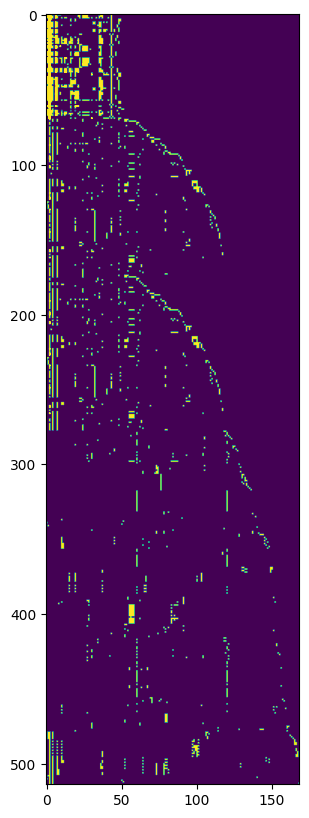

In [232]:
# Make tags into indicator matrix
tags_mat = tags[tags.columns[3:]].to_numpy()
plt.figure(figsize=(10, 10))
plt.imshow(tags_mat, vmin=0, vmax=1)
plt.show
# pcm.indicator(tags_mat)


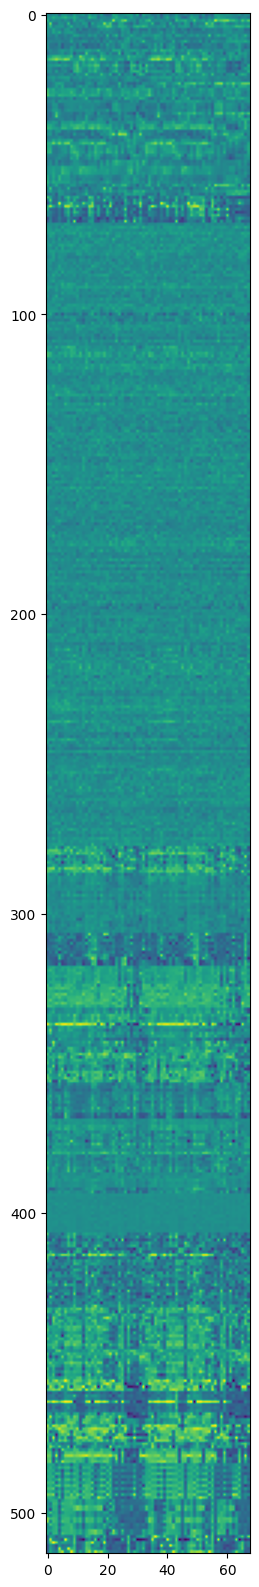

In [233]:
plt.figure(figsize=(20, 20))
plt.imshow(profile_mat)
# Make figure bigger



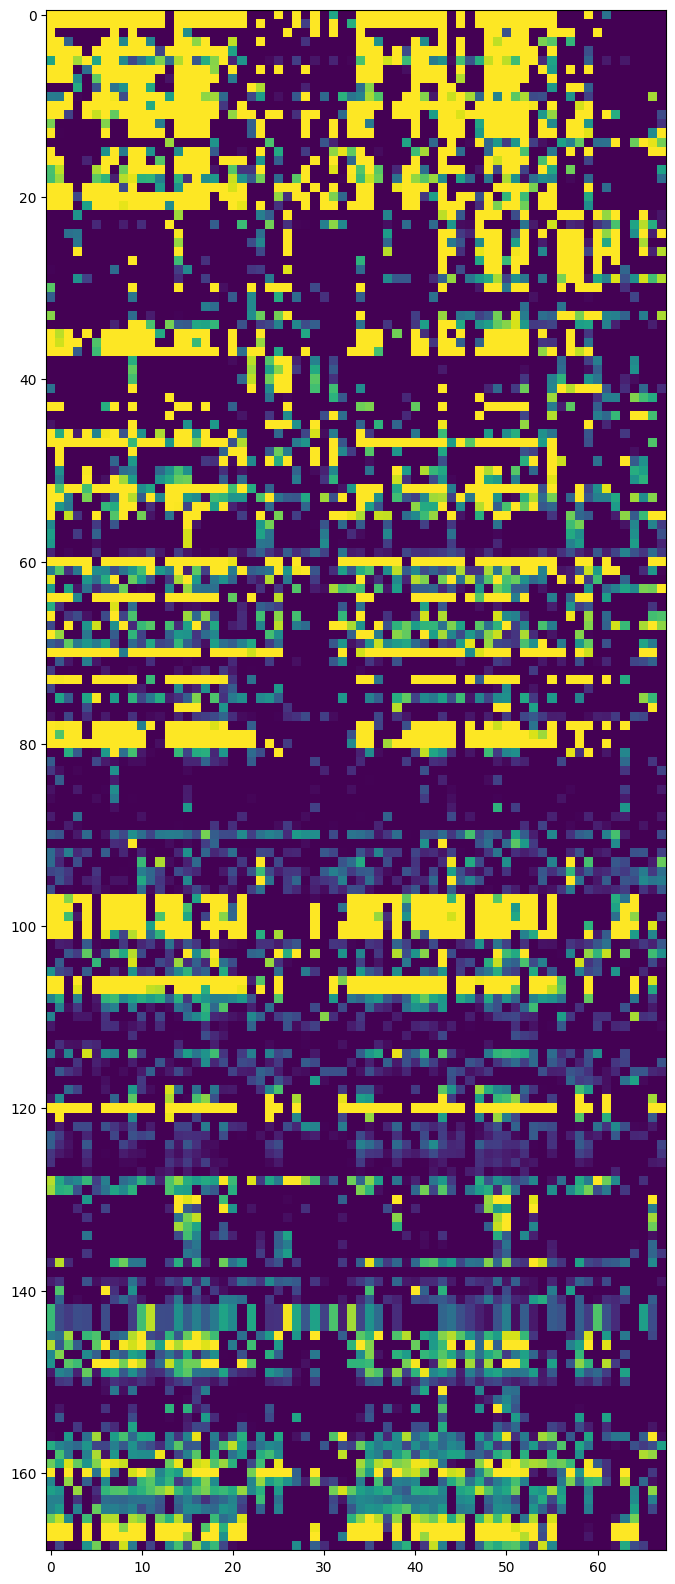

In [234]:
# Multiply profile by tags
features = profile_mat.T @ tags_mat
features = features.T
plt.figure(figsize=(20, 20))
plt.imshow(features, vmin=0, vmax=1)


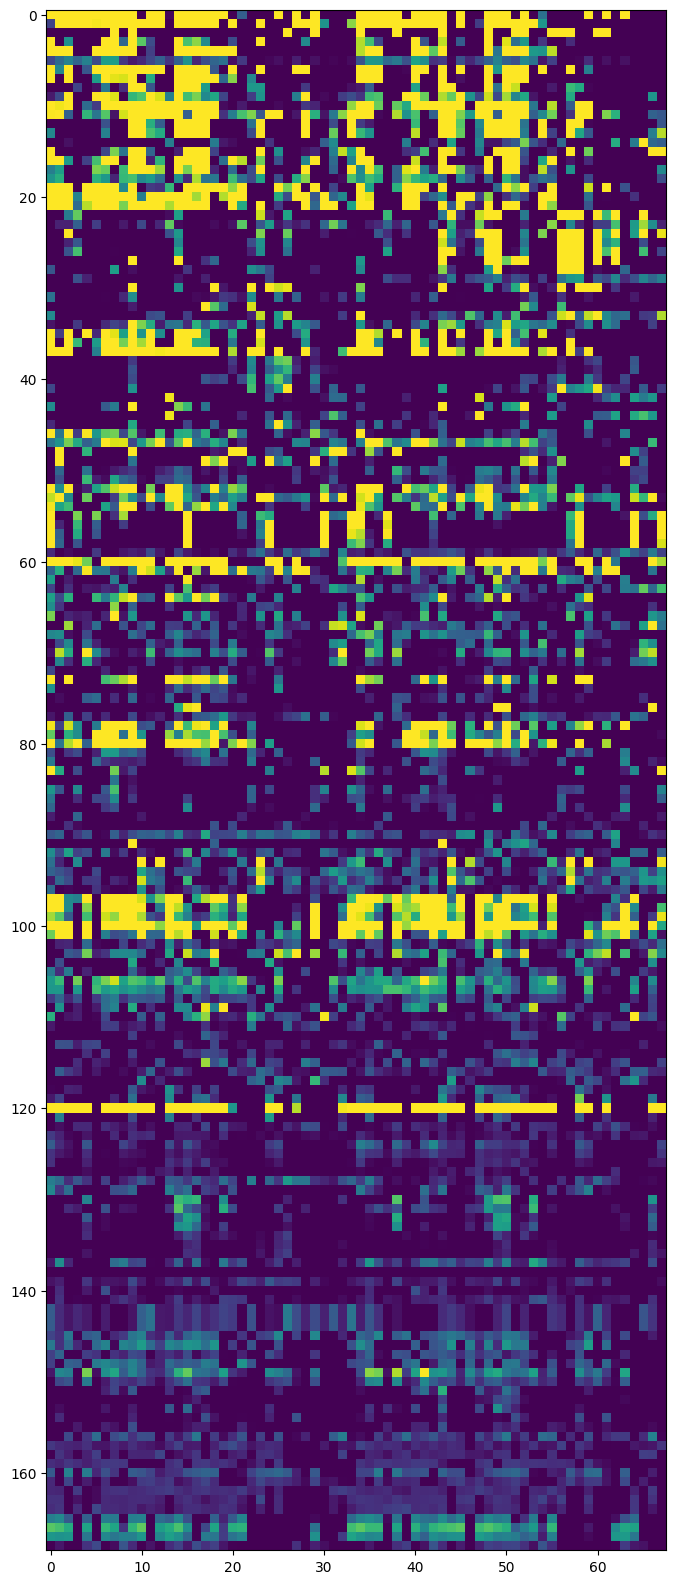

In [235]:
# Multiply profile by tags
features_norm = profile_norm.T @ tags_mat
features_norm = features_norm.T
plt.figure(figsize=(20, 20))
plt.imshow(features_norm, vmin=0, vmax=1)


In [236]:
def print_tags(profile, df, labels, region=None, n=5):

    for i, r in enumerate(labels):
        if (region is None) | (r == region):
            print(f'\nregion {r}')

            # Sort conditions by score
            scores = profile[:, i]
            zipped = zip(scores, df.columns[3:])
            zipped = sorted(zipped, key=lambda x: x[0], reverse=True)
            scores, conds = zip(*zipped[:n])

            [print(f'{cond}: {score}')
             for score, cond in zip(scores, conds)]


In [242]:
dataset = 'Somatotopic'

for region in ['M1R', 'M2R', 'M3aR', 'M3bR', 'M3bL', 'M4aR']:
    print_highest(profile_norm, profile, labels, region=region, dataset=dataset)
    # print_highest(profile_mat, profile, labels, region=region)
    # print_tags(features, tags, labels, region=region)
    print_tags(features_norm, tags, labels, region=region, n=10)



region M1R
Somatotopic tongue: -0.07349546141331743
Somatotopic glutes: -0.1084920624466138
Somatotopic hand-right: -0.10906969346010026
Somatotopic hand-left: -0.11988169916150544
Somatotopic foot-right: -0.15896319429569924

region M1R
left_hand_response_execution: 12.32650772572504
visual_sentence_comprehension: 5.316109644933814
response_alternative: 4.13326251085434
left_finger_response_execution: 4.122938906980177
visual_attention: 3.7390081267181965
attentional_focusing: 3.15119841205484
spatial_attention: 3.096862356979261
working_memory: 2.7473823550240284
visual_buffer: 2.5228894278864997
task_difficulty: 2.4255855717751467

region M2R
Somatotopic tongue: 0.17777773081449813
Somatotopic hand-right: 0.15823177795183216
Somatotopic hand-left: 0.08689793655477702
Somatotopic glutes: 0.06477722296796924
Somatotopic foot-right: 0.049266336686270305

region M2R
right_hand_response_execution: 13.89551518915514
left_hand_response_execution: 8.89488704100785
visual_sentence_comprehen

In [243]:
dataset = None

for region in ['S1aR', 'S2aR', 'S3R', 'S4aR']:
    print_highest(profile_norm, profile, labels,
                  region=region, dataset=dataset)
    # print_highest(profile_mat, profile, labels, region=region)
    # print_tags(features, tags, labels, region=region)
    print_tags(features_norm, tags, labels, region=region, n=10)



region S1aR
IBC p-startup: 0.41406157159463935
Nishimoto Clock: 0.38250003267616073
MDTB ToM: 0.35022659934482625
MDTB ToM: 0.3401205445241647
Nishimoto RateNoisy: 0.33579798973050956

region S1aR
saccadic_eye_movement: 26.20124605748762
lexical_processing: 2.2067017250302103
visual_word_recognition: 1.9368086129109012
narrative_comprehension: 1.8632737537171626
language: 1.8479215667216313
long_term_memory: 1.62135194603118
language_processing: 1.429320008739902
semantic_knowledge: 1.2062132760078272
social_cognition: 1.0377249497324694
creative_thinking: 0.9252506085261332

region S2aR
Nishimoto AnimalVoice: 0.31699048402775515
Nishimoto Metaphor: 0.3146498888705011
Nishimoto ForeignReadQ: 0.31133722722569646
MDTB ToM: 0.29167873300494024
Nishimoto MemoryNameEasy: 0.28657474439569197

region S2aR
saccadic_eye_movement: 69.25094221243118
semantic_knowledge: 1.606654922147864
lexical_processing: 1.5622365721981248
long_term_memory: 1.4556392139872019
language: 1.3515679946717256
narra

In [246]:

dataset = None

for region in ['I1aL',
               'I1bL',
               'I2L']:
    print_highest(profile_norm, profile, labels,
                  region=region, dataset=dataset)
    # print_highest(profile_mat, profile, labels, region=region)
    # print_tags(features, tags, labels, region=region)
    print_tags(features_norm, tags, labels, region=region, n=10)



region I1aL
MDTB VideoAct: 0.3630583435377129
MDTB VideoAct: 0.36243861951801176
Somatotopic hand-left: 0.2943481994712636
Nishimoto PropLogic: 0.28238191304507976
Nishimoto DetectDifference: 0.280102487576955

region I1aL
left_hand_response_execution: 5.744095035977968
film_viewing: 2.7676849207684215
retrieve: 1.8680818075765537
visual_sentence_comprehension: 1.8602173559580837
response_execution: 1.8264020335788431
visual_attention: 1.4998199895388875
feature_comparison: 1.3145394292239676
visual_buffer: 1.2503505660601282
visual_string_recognition: 1.2381389602962969
easy: 1.1871554471444157

region I1bL
MDTB VideoKnots: 0.31586179221670563
IBC we-all-reference: 0.304431011248325
Nishimoto DetectTargetPic: 0.27382728923533395
IBC intersection: 0.25592766544623985
Nishimoto CalcHard: 0.25437935058848105

region I1bL
response_alternative: 2.1205795802438328
spatial_attention: 1.903013837709
visual_object_recognition: 1.8367827514063109
right_hand_response_execution: 1.66461287591388